In [1]:
# import display libs
from IPython.display import Image
%matplotlib inline
from IPython.display import Latex

In [2]:
# import libs
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


# setup figure params
figureparams = {'axes.labelsize': 24,
           'axes.titlesize': 20,
           'axes.linewidth': 1.3,
           'font.size': 20,
           'legend.fontsize': 18,
           'figure.figsize': (10,7),
           'font.family': 'serif',
           'font.serif': 'Computer Modern Roman',
           'xtick.labelsize': 18,
           'xtick.major.size': 5.5,
           'xtick.major.width': 1.3,
           'ytick.labelsize': 18,
           'ytick.major.size': 5.5,
           'ytick.major.width': 1.3,
           'text.usetex': True,
           'figure.autolayout': True}
plt.rcParams.update(figureparams)
matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['text.latex.unicode']=True
matplotlib.get_configdir()

C:\Users\EdwardJansenADC\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.


'C:\\Users\\EdwardJansenADC\\.matplotlib'

# Data Visualization

Formally, one could argue that data visualization should be part of data exploration. However, here I chose to separate the two on the grounds that exploration dives more into outliers/missing values and visualization more in the variables themselves. 

There are tons of ways to generate insights into the data through visualization. Here, to show some bare basics, we will do three things: we will look at the distribution of defaults, the distribution of explanatory variables split out according to whether a default occurs and look at the evolving of the variables through time.

### Load Data

In [4]:
df = pd.read_csv('data/randomisedData.csv')
cols = df.columns
numvars = cols[df.dtypes != 'object']
cats = cols[df.dtypes == 'object']

### Distribution target / non-target

Let's first look at the distribution of defaults. We see that the default (1) and no-default (0) classes are unbalanced. Funnily, we seem to have more defaults than non-defaults, which is usually not the case. (Or we misunderstood the binary coding.) Knowing that the distribution unbalanced may influence our modelling strategy if we were to build a VERY COMPLICATED model for a VERY IMPORTANT client. For now, we'll take note of this and continue.

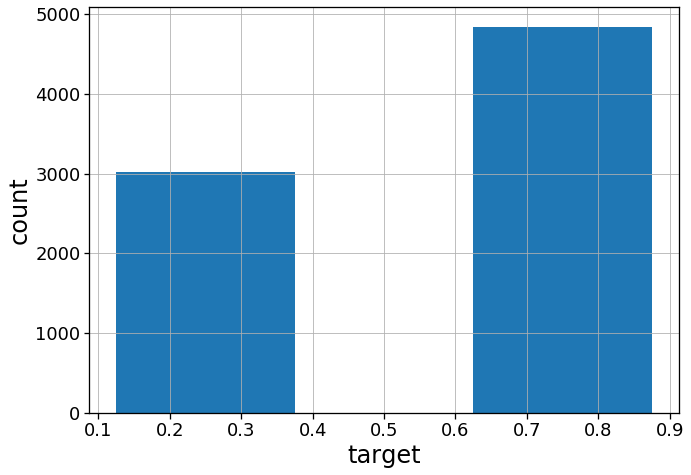

In [17]:
plt.figure()
df.target.hist(bins=2, rwidth=0.5);
plt.xlabel('target')
plt.ylabel('count')
plt.savefig('figs/target_var.png')

Next, we'll generate boxplots of the distribution of the explanatory variables split out to default/no-default cases. The idea is that of the boxplots of a variable are very different, then potentially that variable is a very good predictor. It gives us a first look into the potential performance of the model.

<Figure size 720x504 with 0 Axes>

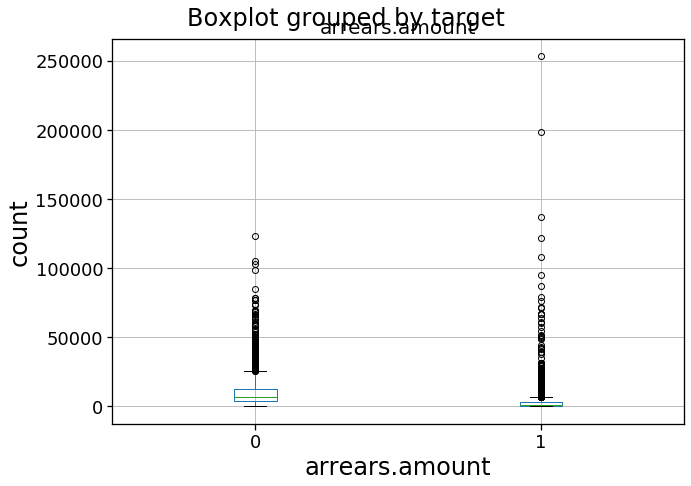

<Figure size 720x504 with 0 Axes>

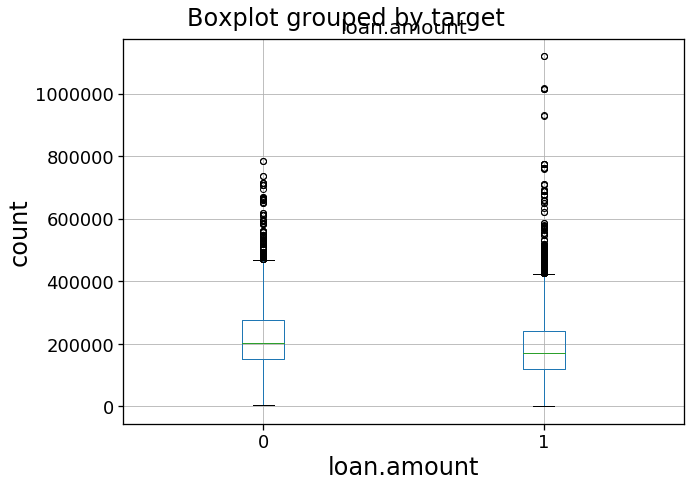

<Figure size 720x504 with 0 Axes>

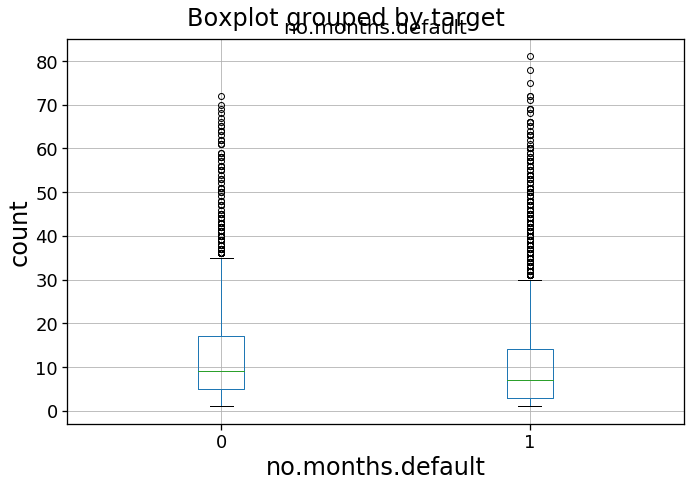

<Figure size 720x504 with 0 Axes>

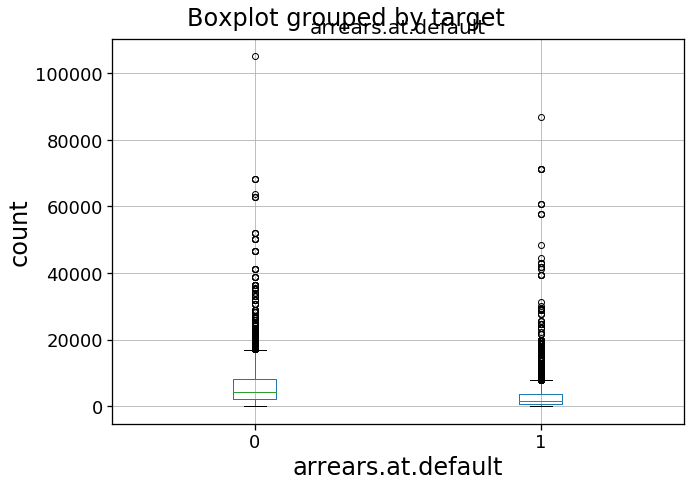

<Figure size 720x504 with 0 Axes>

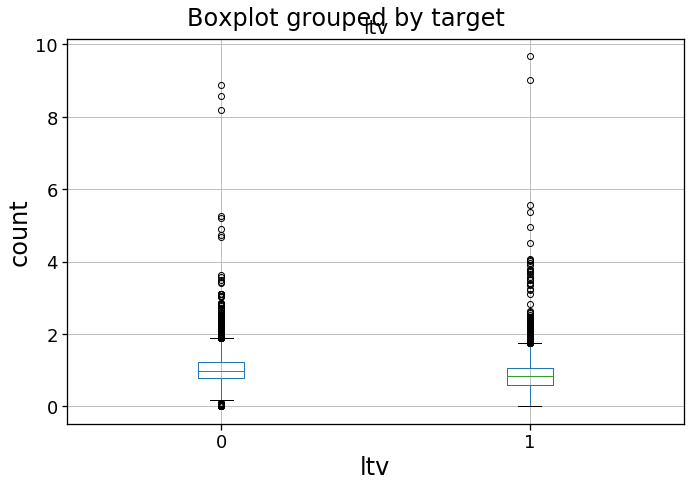

<Figure size 720x504 with 0 Axes>

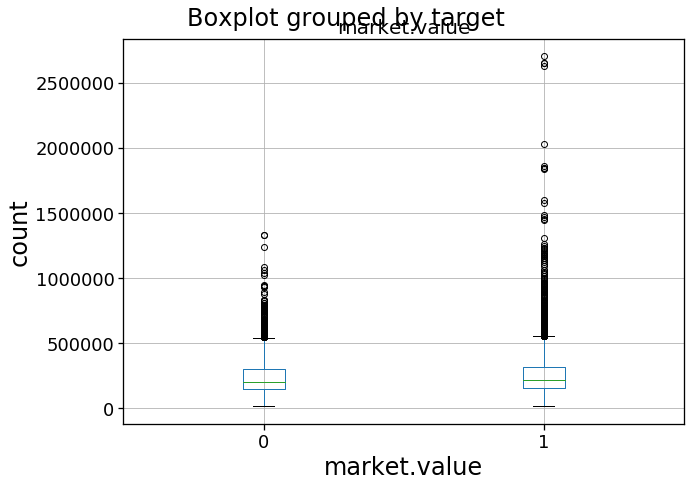

<Figure size 720x504 with 0 Axes>

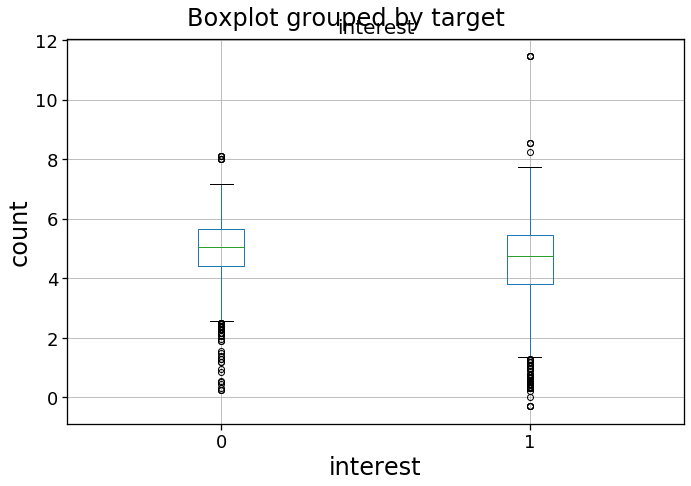

<Figure size 720x504 with 0 Axes>

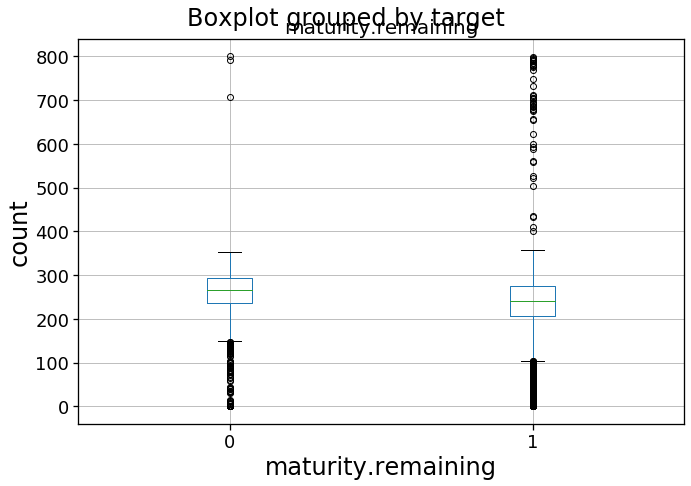

<Figure size 720x504 with 0 Axes>

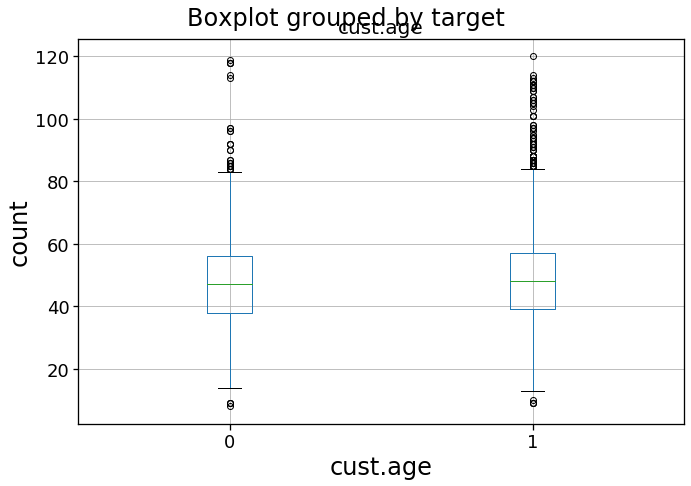

In [18]:
# leave out the plots for ID and target
for i in numvars[1:-2]:
    plt.figure()
    df.boxplot(column = i, by='target');
    plt.xlabel(i)
    plt.ylabel('count')
    plt.savefig('figs/'+str(i)+str('.png'))

### TODO: Variables through time

Some text abt why we want this and what it tells us.

In [19]:
df

,ID,period,arrears.amount,loan.amount,no.months.default,arrears.at.default,ltv,market.value,interest,region,housing,maturity.remaining,gender,cust.age,years.as.customer,target
0,1,2009-11-01,857.329788,25115.573925,9,857.329788,0.133927,187532.278850,5.100,Flevoland,Single family house,44,Unknown,110,12,1
1,1,2010-02-01,857.329788,23854.722600,12,857.329788,0.130848,182309.251667,5.100,Flevoland,Single family house,41,Unknown,110,12,1
2,1,2010-05-01,857.329788,22577.723866,15,857.329788,0.125710,179601.012778,5.100,Flevoland,Single family house,38,Unknown,110,12,1
3,1,2010-08-01,857.329788,21284.369504,18,857.329788,0.119539,178053.442828,5.100,Flevoland,Single family house,35,Unknown,111,13,1
4,2,2010-08-01,1069.136341,38034.356717,3,1069.136341,0.168461,225774.908577,5.200,Noord-Holland,Single family house,561,Unknown,107,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861,2830,2012-11-01,16804.902036,290768.518856,6,15621.477931,0.674029,431388.814456,6.486,Overijssel,Shop/private house,7,Unknown,45,13,1
7862,2831,2011-06-01,337.340000,125602.956323,2,337.340000,0.729341,172214.338773,5.979,Utrecht,Flat/appartment,15,Unknown,33,6,1
7863,2832,2012-06-01,43036.594322,659998.592244,12,43036.594322,0.906410,728145.685885,3.606,Friesland,Rural estate,273,Unknown,49,0,1
7864,2832,2012-09-01,49297.893578,659998.592244,15,43036.594322,0.917205,719575.914818,3.027,Friesland,Rural estate,270,Unknown,49,0,1
